In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('Auto.csv', na_values='?').dropna()

data['american'] = 0
data['european'] = 0
data['japanese'] = 0
data.loc[(data.origin == 1), 'american']= 1
data.loc[(data.origin == 2), 'european']= 1
data.loc[(data.origin == 3), 'japanese']= 1

medianMpg = data['mpg'].median()
data.loc[(data.mpg > medianMpg),'mpg01'] = 1
data.loc[(data.mpg < medianMpg),'mpg01'] = 0
data.mpg01 = pd.to_numeric(data.mpg01)

data.drop(['origin', 'name'], axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,american,european,japanese,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,0,0,1.0
393,44.0,4,97.0,52.0,2130,24.6,82,0,1,0,1.0
394,32.0,4,135.0,84.0,2295,11.6,82,1,0,0,1.0
395,28.0,4,120.0,79.0,2625,18.6,82,1,0,0,1.0


In [ ]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
american          int64
european          int64
japanese          int64
mpg01           float64
dtype: object

Text(0.5, 1.0, 'mpg vs year')

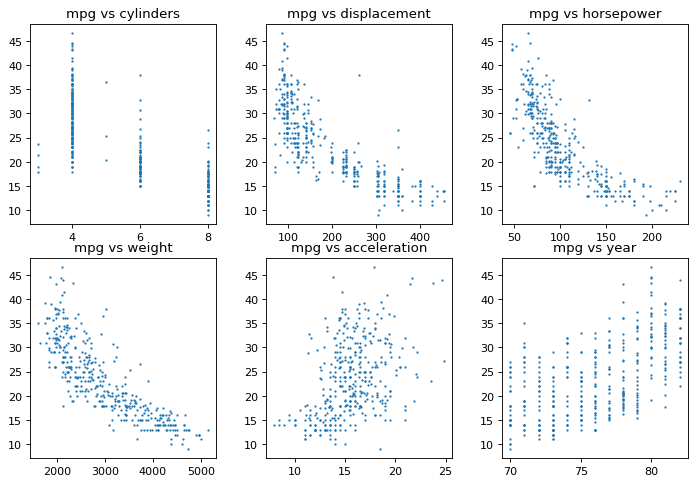

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, axs = plt.subplots(2, 3, figsize=(9, 6), dpi = 80)
fig.tight_layout()

axs[0, 0].scatter(data['cylinders'],data['mpg'], s=1)
axs[0, 0].set_title('mpg vs cylinders')
axs[0, 1].scatter( data['displacement'],data['mpg'], s=1)
axs[0, 1].set_title('mpg vs displacement')
axs[0, 2].scatter( data['horsepower'],data['mpg'], s=1)
axs[0, 2].set_title('mpg vs horsepower')

axs[1, 0].scatter(data['weight'], data['mpg'],s=1)
axs[1, 0].set_title('mpg vs weight')
axs[1, 1].scatter(data['acceleration'], data['mpg'],s=1)
axs[1, 1].set_title('mpg vs acceleration')
axs[1, 2].scatter(data['year'], data['mpg'], s=1)
axs[1, 2].set_title('mpg vs year')



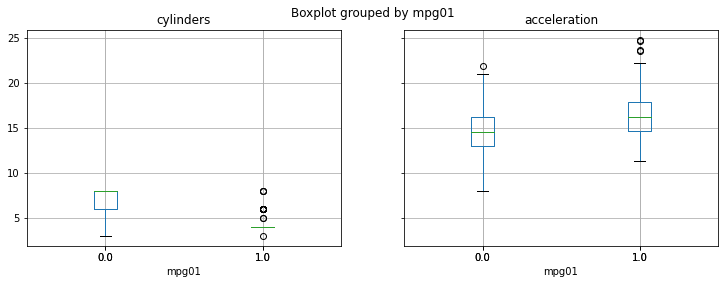

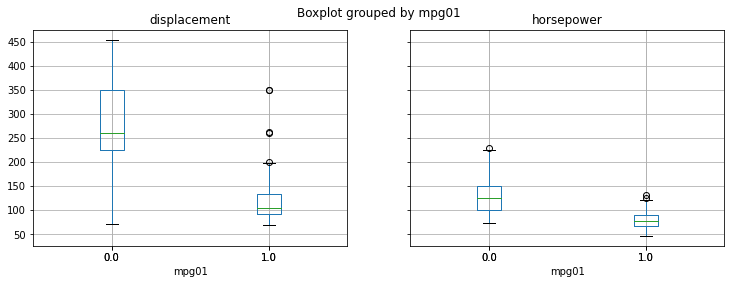

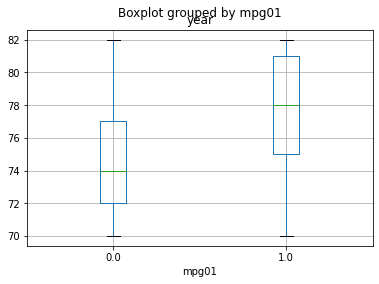

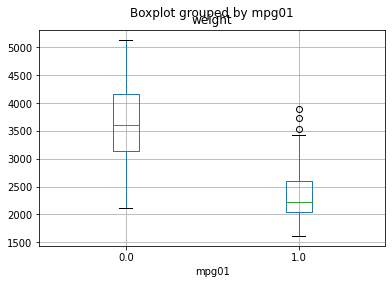

In [ ]:
data.boxplot(column= ['cylinders', 'acceleration'], by='mpg01', figsize=(12,4))
data.boxplot(column= ['displacement', 'horsepower'], by='mpg01', figsize=(12,4))
data.boxplot(column= ['year'], by='mpg01', figsize=(6,4))
data.boxplot(column= ['weight'], by='mpg01', figsize=(6,4))



In [4]:
from sklearn.model_selection import train_test_split 

y = data['mpg01']
data.drop('mpg', axis=1)
X = data[['cylinders','displacement','horsepower', 'weight', 'acceleration', 'year']]

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

X_train

,cylinders,displacement,horsepower,weight,acceleration,year
368,4,112.0,88.0,2640,18.6,82
182,4,107.0,86.0,2464,15.5,76
120,4,121.0,112.0,2868,15.5,73
309,4,98.0,76.0,2144,14.7,80
221,8,305.0,145.0,3880,12.5,77
...,...,...,...,...,...,...
72,8,304.0,150.0,3892,12.5,72
107,6,232.0,100.0,2789,15.0,73
272,4,151.0,85.0,2855,17.6,78
352,4,98.0,65.0,2380,20.7,81


In [5]:
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

lda = LinearDiscriminantAnalysis(solver='svd')
testPredictions = lda.fit(X_train, y_train).predict(X_test)

cm_df = pd.DataFrame(confusion_matrix(y_test, testPredictions).T, index=["Low", "High"], columns=["Low", "High"])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)  
print(classification_report(y_test, testPredictions, digits=3))

True       Low  High
Predicted           
Low         54     0
High        16    60
              precision    recall  f1-score   support

         0.0      1.000     0.771     0.871        70
         1.0      0.789     1.000     0.882        60

    accuracy                          0.877       130
   macro avg      0.895     0.886     0.877       130
weighted avg      0.903     0.877     0.876       130



In [ ]:
qda = QuadraticDiscriminantAnalysis()
testPredictions = qda.fit(X_train,y_train).predict(X_test)

cm_df = pd.DataFrame(confusion_matrix(y_test, testPredictions).T, index=["Low", "High"], columns=["Low", "High"])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)  
print(classification_report(y_test, testPredictions, digits=3))


True       Low  High
Predicted           
Low         56     1
High        14    59
              precision    recall  f1-score   support

         0.0      0.982     0.800     0.882        70
         1.0      0.808     0.983     0.887        60

    accuracy                          0.885       130
   macro avg      0.895     0.892     0.885       130
weighted avg      0.902     0.885     0.884       130



In [7]:
regr = skl_lm.LogisticRegression()
testPredictions = regr.fit(X_train, y_train).predict(X_test)

cm_df = pd.DataFrame(confusion_matrix(y_test, testPredictions).T, index=["Low", "High"], columns=["Low", "High"])
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)  
print(classification_report(y_test, testPredictions, digits=3))


True       Low  High
Predicted           
Low         54     0
High        16    60
              precision    recall  f1-score   support

         0.0      1.000     0.771     0.871        70
         1.0      0.789     1.000     0.882        60

    accuracy                          0.877       130
   macro avg      0.895     0.886     0.877       130
weighted avg      0.903     0.877     0.876       130



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:

def KNN(n_neighbors=1, weights='uniform'):
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    testPredictions = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    return(testPredictions, score, clf.classes_)

for i in [1,3,5,10, 20]:
    testPredictions, score, classes = KNN(i)
    cm_df = pd.DataFrame(confusion_matrix(y_test, testPredictions).T, index=["Low", "High"], columns=["Low", "High"])
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)  
    print(classification_report(y_test, testPredictions, digits=3))

True       Low  High
Predicted           
Low         53     3
High        17    57
              precision    recall  f1-score   support

         0.0      0.946     0.757     0.841        70
         1.0      0.770     0.950     0.851        60

    accuracy                          0.846       130
   macro avg      0.858     0.854     0.846       130
weighted avg      0.865     0.846     0.846       130

True       Low  High
Predicted           
Low         52     1
High        18    59
              precision    recall  f1-score   support

         0.0      0.981     0.743     0.846        70
         1.0      0.766     0.983     0.861        60

    accuracy                          0.854       130
   macro avg      0.874     0.863     0.853       130
weighted avg      0.882     0.854     0.853       130

True       Low  High
Predicted           
Low         49     1
High        21    59
              precision    recall  f1-score   support

         0.0      0.980     0.700     0